<a href="https://colab.research.google.com/github/brendaFlavia/DataVisualization/blob/main/TextAnalysis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
#import gensim.corpora as corpora
from gensim import corpora, models
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
import spacy
import matplotlib.pyplot as plt
import nltk
import spacy
import pathlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from gensim.parsing.preprocessing import STOPWORDS



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

#train and Validation data directory 
data_dir = pathlib.Path('/content/gdrive/My Drive/Data Visualization/Comments.xlsx') 
data_json = pathlib.Path('/content/gdrive/My Drive/Data Visualization/Comments.json') 

Mounted at /content/gdrive


In [ ]:
#read excel data using pandas
comment_data = pd.read_excel(data_dir)

print shape of dataset

In [ ]:
print('Dataset size:',comment_data.shape)

Dataset size: (4084, 2)


In [ ]:
#see number of columns
print('Columns are:',comment_data.columns)

Columns are: Index(['comment_id', 'Comment'], dtype='object')


In [ ]:
#print information about dataset
comment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  4084 non-null   int64 
 1   Comment     4083 non-null   object
dtypes: int64(1), object(1)
memory usage: 63.9+ KB


In [ ]:
import nltk
nltk.download('stopwords')
nlp=spacy.load('en_core_web_sm',disable=['parser', 'ner'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove punctuation
comment_data['Comment'] = comment_data['Comment'].map(lambda x: re.sub('[,\.!?]', '', x))

In [ ]:
#cleaning the text 
def tokeniz(sentences):
   for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
processed_data = list(tokeniz(comment_data['Comment']))

In [ ]:
print(processed_data)

[['djfjkdfjkjkffdk', 'edited'], ['faith', 'has', 'exhibited', 'enthusiasm', 'in', 'taking', 'on', 'the', 'project', 'at', 'hand', 'she', 'has', 'already', 'shown', 'promising', 'signs', 'in', 'understanding', 'the', 'core', 'concepts', 'of', 'software', 'engineering', 'look', 'forward', 'discovering', 'more', 'as', 'time', 'goes', 'on'], ['he', 'now', 'has', 'now', 'understood', 'the', 'structure', 'of', 'grails', 'and', 'how', 'different', 'components', 'relate', 'understands', 'the', 'process', 'of', 'getting', 'api', 'from', 'mtn'], ['the', 'intern', 'was', 'oriented', 'on', 'ict', 'setup', 'and', 'infrastructure', 'of', 'soroti', 'university', 'drafted', 'workplan', 'and', 'started', 'off', 'the', 'internship', 'simon', 'was', 'encouraged', 'to', 'take', 'the', 'internship', 'seriously', 'as', 'there', 'was', 'lot', 'to', 'learn'], ['the', 'student', 'was', 'oriented', 'on', 'the', 'organization', 'structure', 'developed', 'workplan', 'for', 'the', 'week', 'internship', 'and', 'par

In [ ]:
print(processed_data[:1][0][:30])

['djfjkdfjkjkffdk', 'edited']


In [ ]:
#Building Bigram & Trigram Models
bigram = gensim.models.phrases.Phrases(processed_data, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[processed_data], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#importing the Stopwords to use them
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use','for'])

In [ ]:
#function to filter out stopwords
def remove_stopwords(texts):
   return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [ ]:

#function to create bigrams
def create_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]

In [ ]:
#function to create trigrams
def create_trigrams(texts):
   [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
#function for lemmatization
def lemmatize(texts, allowed_postags=['NOUN', 'ADJ', 'VERB','ADV']):
   texts_op = []
   for sent in texts:
      doc = nlp(" ".join(sent))
      texts_op.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_op

Bigram a two-word sequence of words, tigram a three-word sequence of words in a corpus

In [ ]:
#removing stopwords, creating bigrams and lemmatizing the text
data_wo_stopwords = remove_stopwords(processed_data)
data_bigrams = create_bigrams(data_wo_stopwords)
data_lemmatized = lemmatize(data_bigrams, allowed_postags=[ 'NOUN', 'ADJ', 'VERB','ADV'])

In [ ]:
#printing the lemmatized data
print(data_lemmatized[:7])

[['edit'], ['faith', 'exhibit', 'enthusiasm', 'take', 'project', 'hand', 'already', 'show', 'promising', 'sign', 'understand', 'core', 'concept', 'software_engineere', 'look_forward', 'discover', 'time', 'go'], ['understand', 'structure', 'grail', 'different', 'component', 'relate', 'understand', 'process', 'get', 'api', 'mtn'], ['orient', 'ict', 'setup', 'infrastructure', 'draft', 'workplan', 'start', 'internship', 'encourage', 'take', 'internship', 'seriously', 'lot', 'learn'], ['student', 'orient', 'organization', 'structure', 'develop', 'workplan', 'week', 'internship', 'participate', 'assessment', 'printer', 'servicing', 'acquire', 'technical', 'teamwork', 'skill', 'workplace'], ['activity', 'well', 'complete'], ['finish', 'time']]


In [ ]:
#converts the comments to string
comment_data['Comment']=comment_data['Comment'].astype(str)

display bigram/tigram 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stop_words, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(comment_data['Comment'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
df_ngram

,frequency,bigram/trigram
0,208,successfully completed
1,194,end internship
2,185,week tasks
3,185,completed week
4,149,successfully completed week
...,...,...
52801,1,10 hour
52802,1,10 enterprise windows
52803,1,10 enterprise
52804,1,10 dhcp client


In [ ]:
#creating a dictionary
gensim_dictionary = corpora.Dictionary(data_lemmatized)

In [ ]:
texts = data_lemmatized

In [ ]:
print(texts)

[['edit'], ['faith', 'exhibit', 'enthusiasm', 'take', 'project', 'hand', 'already', 'show', 'promising', 'sign', 'understand', 'core', 'concept', 'software_engineere', 'look_forward', 'discover', 'time', 'go'], ['understand', 'structure', 'grail', 'different', 'component', 'relate', 'understand', 'process', 'get', 'api', 'mtn'], ['orient', 'ict', 'setup', 'infrastructure', 'draft', 'workplan', 'start', 'internship', 'encourage', 'take', 'internship', 'seriously', 'lot', 'learn'], ['student', 'orient', 'organization', 'structure', 'develop', 'workplan', 'week', 'internship', 'participate', 'assessment', 'printer', 'servicing', 'acquire', 'technical', 'teamwork', 'skill', 'workplace'], ['activity', 'well', 'complete'], ['finish', 'time'], ['student', 'weekly', 'progress', 'justifiably', 'good', 'characterized', 'enthusiasm', 'learning'], ['note'], ['find', 'interesting', 'able', 'identify', 'know', 'problem', 'associate', 'overcome'], ['partially', 'do', 'expect', 'well', 'result', 'base

In [ ]:
#building a corpus for the topic model
gensim_corpus = [gensim_dictionary.doc2bow(text) for text in texts]

In [ ]:
#printing the corpus we created above.
print(gensim_corpus[:5]) 

[[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(16, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [(27, 1), (32, 1), (35, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)]]


In [ ]:
#we can print the words with their frequencies.
[[(gensim_dictionary[id], freq) for id, freq in cp] for cp in gensim_corpus[:100]] 

[[('edit', 1)],
 [('already', 1),
  ('concept', 1),
  ('core', 1),
  ('discover', 1),
  ('enthusiasm', 1),
  ('exhibit', 1),
  ('faith', 1),
  ('go', 1),
  ('hand', 1),
  ('look_forward', 1),
  ('project', 1),
  ('promising', 1),
  ('show', 1),
  ('sign', 1),
  ('software_engineere', 1),
  ('take', 1),
  ('time', 1),
  ('understand', 1)],
 [('understand', 2),
  ('api', 1),
  ('component', 1),
  ('different', 1),
  ('get', 1),
  ('grail', 1),
  ('mtn', 1),
  ('process', 1),
  ('relate', 1),
  ('structure', 1)],
 [('take', 1),
  ('draft', 1),
  ('encourage', 1),
  ('ict', 1),
  ('infrastructure', 1),
  ('internship', 2),
  ('learn', 1),
  ('lot', 1),
  ('orient', 1),
  ('seriously', 1),
  ('setup', 1),
  ('start', 1),
  ('workplan', 1)],
 [('structure', 1),
  ('internship', 1),
  ('orient', 1),
  ('workplan', 1),
  ('acquire', 1),
  ('assessment', 1),
  ('develop', 1),
  ('organization', 1),
  ('participate', 1),
  ('printer', 1),
  ('servicing', 1),
  ('skill', 1),
  ('student', 1),
  (

Latent Dirichlet Allocation is a generative probabilistic model for collections of discrete dataset such as text corpora. It is also a topic model that is used for discovering abstract topics from a collection of documents.

In [ ]:

lda_model = gensim.models.LdaMulticore(gensim_corpus,
                                       num_topics=5, 
                                       id2word = gensim_dictionary,  
                                       random_state=100,
                                       chunksize=100,
                                       passes = 50, 
                                       per_word_topics=True,
                                       workers=10) 

In [ ]:
from pprint import pprint
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[gensim_corpus]

[(0,
  '0.054*"internship" + 0.039*"end" + 0.028*"code" + 0.028*"skill" + '
  '0.028*"acquire" + 0.022*"system" + 0.020*"successfully" + 0.018*"challenge" '
  '+ 0.018*"write" + 0.016*"suppose"'),
 (1,
  '0.040*"complete" + 0.035*"task" + 0.031*"server" + 0.027*"week" + '
  '0.026*"network" + 0.023*"also" + 0.023*"set" + 0.019*"successfully" + '
  '0.012*"work" + 0.012*"internet"'),
 (2,
  '0.032*"good" + 0.024*"work" + 0.023*"learn" + 0.023*"time" + 0.018*"task" + '
  '0.018*"student" + 0.014*"system" + 0.012*"new" + 0.012*"team" + '
  '0.012*"week"'),
 (3,
  '0.039*"week" + 0.038*"complete" + 0.036*"task" + 0.034*"challenge" + '
  '0.028*"encourage" + 0.026*"progressive" + 0.024*"successfully" + '
  '0.023*"manage" + 0.023*"internship" + 0.021*"well"'),
 (4,
  '0.035*"work" + 0.025*"well" + 0.016*"good" + 0.014*"team" + 0.013*"keep" + '
  '0.011*"make" + 0.010*"progress" + 0.010*"great" + 0.010*"project" + '
  '0.009*"use"')]


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=gensim_dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
a=0.01
b=0.1
k=5
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(gensim_corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(gensim_corpus, num_of_docs*0.75), 
               gensim_corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=gensim_dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

In [ ]:
## check the bow_corpus
bow_doc_100 = gensim_corpus[3]

for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                                     gensim_dictionary[bow_doc_100[i][0]], 
                                                     bow_doc_100[i][1]))

Word 16 ("take") appears 1 time.
Word 28 ("draft") appears 1 time.
Word 29 ("encourage") appears 1 time.
Word 30 ("ict") appears 1 time.
Word 31 ("infrastructure") appears 1 time.
Word 32 ("internship") appears 2 time.
Word 33 ("learn") appears 1 time.
Word 34 ("lot") appears 1 time.
Word 35 ("orient") appears 1 time.
Word 36 ("seriously") appears 1 time.
Word 37 ("setup") appears 1 time.
Word 38 ("start") appears 1 time.
Word 39 ("workplan") appears 1 time.


In [ ]:
# Human readable format of corpus (term-frequency)
[[(gensim_dictionary[id], freq) for id, freq in cp] for cp in gensim_corpus[:3]]

[[('edit', 1)],
 [('already', 1),
  ('concept', 1),
  ('core', 1),
  ('discover', 1),
  ('enthusiasm', 1),
  ('exhibit', 1),
  ('faith', 1),
  ('go', 1),
  ('hand', 1),
  ('look_forward', 1),
  ('project', 1),
  ('promising', 1),
  ('show', 1),
  ('sign', 1),
  ('software_engineere', 1),
  ('take', 1),
  ('time', 1),
  ('understand', 1)],
 [('understand', 2),
  ('api', 1),
  ('component', 1),
  ('different', 1),
  ('get', 1),
  ('grail', 1),
  ('mtn', 1),
  ('process', 1),
  ('relate', 1),
  ('structure', 1)]]

In [ ]:
##print out the key words of five topics
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.054*"internship" + 0.039*"end" + 0.028*"code" + 0.028*"skill" + 0.028*"acquire" + 0.022*"system" + 0.020*"successfully" + 0.018*"challenge" + 0.018*"write" + 0.016*"suppose"


Topic: 1 
Words: 0.040*"complete" + 0.035*"task" + 0.031*"server" + 0.027*"week" + 0.026*"network" + 0.023*"also" + 0.023*"set" + 0.019*"successfully" + 0.012*"work" + 0.012*"internet"


Topic: 2 
Words: 0.032*"good" + 0.024*"work" + 0.023*"learn" + 0.023*"time" + 0.018*"task" + 0.018*"student" + 0.014*"system" + 0.012*"new" + 0.012*"team" + 0.012*"week"


Topic: 3 
Words: 0.039*"week" + 0.038*"complete" + 0.036*"task" + 0.034*"challenge" + 0.028*"encourage" + 0.026*"progressive" + 0.024*"successfully" + 0.023*"manage" + 0.023*"internship" + 0.021*"well"


Topic: 4 
Words: 0.035*"work" + 0.025*"well" + 0.016*"good" + 0.014*"team" + 0.013*"keep" + 0.011*"make" + 0.010*"progress" + 0.010*"great" + 0.010*"project" + 0.009*"use"




In [ ]:
documents_lda_topics = pd.DataFrame(columns = ["Excellent", "Good", "Neutral", "Poor", "Very Poor"])
for i in range(len(gensim_corpus)):
    if i % 50 ==0:
        print(i)
    documents_lda_topics.loc[i] = [0] * 5

    output = lda_model.get_document_topics(gensim_corpus[i])
    for j in range(len(output)):
        a = output[j][0]
        b = output[j][1]
        documents_lda_topics.iloc[i,a] = b

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050


In [ ]:
## pick the final topic for each abstract based on max-probability
for i in range(5):
    documents_lda_topics.iloc[:, i] = documents_lda_topics.iloc[:, i].astype('float64', copy=False)
    
documents_lda_topics["final_topic"] =documents_lda_topics.iloc[:, :10].idxmax(axis=1)

In [ ]:
documents_lda_topics["final_topic"]

0            Good
1         Neutral
2       Very Poor
3       Very Poor
4       Very Poor
          ...    
4079      Neutral
4080      Neutral
4081      Neutral
4082      Neutral
4083    Excellent
Name: final_topic, Length: 4084, dtype: object

In [ ]:
##preview the dataframe for both models
print("LDA + bow_corpus: topic probability:")
documents_lda_topics.head(5)

LDA + bow_corpus: topic probability:


,Excellent,Good,Neutral,Poor,Very Poor,final_topic
0,0.101922,0.598053,0.100007,0.100010,0.100009,Good
1,0.173845,0.010560,0.406167,0.128364,0.281064,Neutral
2,0.017516,0.016783,0.017163,0.245920,0.702619,Very Poor
3,0.161237,0.013465,0.013580,0.013813,0.797906,Very Poor
4,0.163560,0.060138,0.011379,0.101007,0.663916,Very Poor


In [ ]:
result_dir = pathlib.Path('/content/gdrive/My Drive/Data Visualization/results2.csv') 
final_output = texts.join(documents_lda_topics)
final_output.to_csv(result_dir)
final_output

In [ ]:

#calculating and displaying the coherence score
coherence_model_lda = CoherenceModel(
   model=lda_model, texts=data_lemmatized, dictionary=gensim_dictionary, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4234289607001763


In [ ]:
#create a tfidf model
from gensim import corpora, models
tfidf = models.TfidfModel(gensim_corpus)
corpus_tfidf = tfidf[gensim_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


In [ ]:
#Running LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=gensim_dictionary, random_state=100,
                                       chunksize=100,
                                       passes = 50, #Number of passes through the corpus during training.
                                       per_word_topics=True,
                                       workers=10)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.060*"good" + 0.013*"engage" + 0.012*"system" + 0.011*"teammate" + 0.010*"student" + 0.010*"computer" + 0.008*"knowledge" + 0.007*"business" + 0.007*"understanding" + 0.006*"operating"
Topic: 1 Word: 0.015*"server" + 0.013*"do" + 0.011*"configure" + 0.010*"network" + 0.010*"set" + 0.009*"also" + 0.009*"device" + 0.008*"use" + 0.008*"internet" + 0.008*"application"
Topic: 2 Word: 0.012*"internship" + 0.012*"new" + 0.012*"skill" + 0.012*"promise" + 0.011*"finish" + 0.010*"good" + 0.010*"progress" + 0.010*"acquire" + 0.009*"learn" + 0.009*"suppose"
Topic: 3 Word: 0.052*"progressive" + 0.033*"complete" + 0.024*"task" + 0.023*"challenge" + 0.022*"successfully" + 0.020*"week" + 0.019*"internship" + 0.015*"well" + 0.014*"code" + 0.013*"app"
Topic: 4 Word: 0.010*"work" + 0.010*"keep" + 0.008*"learn" + 0.007*"intern" + 0.007*"team" + 0.007*"time" + 0.007*"always" + 0.006*"task" + 0.006*"good" + 0.006*"company"


In [ ]:
gensim_corpus[5]

[(53, 1), (54, 1), (55, 1)]

In [ ]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk.stem as stemmer
from nltk import pos_tag
from nltk.stem import *

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def get_wordcloud(topic):

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=STOPWORDS,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=10,
                    colormap='tab20',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = topic.show_topics(formatted=False)

  fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

  for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')

  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout()
  plt.show()


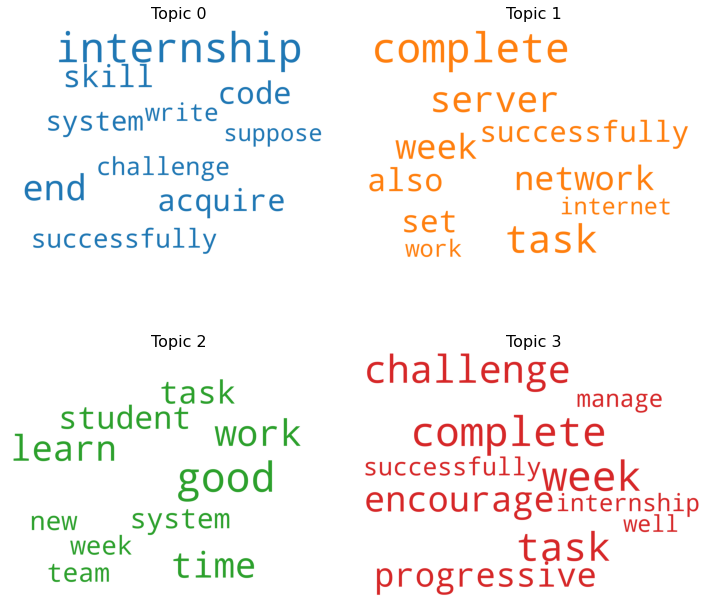

In [ ]:
get_wordcloud(topic= lda_model)

The bar chart by default shows the 30 most salient terms. The bars indicate the total frequency of the term across the entire corpus. Salient is a specific metric, defined at the bottom of the visualization, that can be thought of as a metric used to identify most informative or useful words for identifying topics in the entire collection of texts. Higher saliency values indicate that a word is more useful for identifying a specific topic. 

In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, gensim_corpus, gensim_dictionary)
LDAvis_prepared

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=4c954ad41cc6e05158245ea10e4b12d5284da3e91ecc65f552a1d63f37d187b9
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=6452ff7539b815b2c9401741c69a38ab6bfc0bb7d6cf8988703a75fd85dbe001
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.195648  0.024375       1        1  28.824121
4      0.203040  0.059681       2        1  21.140015
3     -0.147344 -0.078522       3        1  17.383371
1     -0.056466 -0.213383       4        1  16.635350
0     -0.194878  0.207849       5        1  16.017143, topic_info=           Term        Freq       Total Category  logprob  loglift
32   internship  524.000000  524.000000  Default  30.0000  30.0000
54     complete  559.000000  559.000000  Default  29.0000  29.0000
228         end  262.000000  262.000000  Default  28.0000  28.0000
107        task  745.000000  745.000000  Default  27.0000  27.0000
375      server  253.000000  253.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
8            go   49.573032  162.032092   Topic5  -4.9045   0.6472
94       manage   53.913615  275.165315   Topic5  -4.8206   0.2015
55         well   57.601106  560.235874   Topic5  -4.7544  -0.4433
29    encourage   50.501211  296.284141   Topic5  -4.8860   0.0622
58         good   45.294272  637.270986   Topic5  -4.9948  -0.8125

[337 rows x 6 columns], token_table=      Topic      Freq                  Term
term                                       
64        1  0.549403                  able
64        3  0.175031                  able
64        4  0.272270                  able
192       4  0.991674                access
40        5  0.994327               acquire
...     ...       ...                   ...
186       2  0.321887  working_relationship
186       4  0.673036  working_relationship
1092      2  0.068198                 write
1092      4  0.122757                 write
1092      5  0.811559                 write

[427 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 2, 1])

In [ ]:
NER = spacy.load("en_core_web_sm")  #creating an object and loading the pre-trained model for "English"

Create NER model

In [ ]:
#sentence = "Microsoft is looking at buying Uganda startup for £1 million"
#sentence = "Brenda is going to London to see the Queen of England"
sentence='Brenda is going to London to see the Queen of England.To tackle this problem, researchers from Carnegie Mellon University and Fudan University, China have come up with a novel evaluation technique which tackles some of these problems. You can read the original paper here.'

  
doc = nlp(sentence)
  
for ent in doc.ents:
  print(ent.text,"|", ent.label_)

In [ ]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [ ]:
import spacy
from spacy import displacy

In [ ]:
text1=NER("The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well.")

In [ ]:
displacy.render(text1,style="ent",jupyter=True)